# Problem Statement: 
Avocado is a fruit consumed by people heavily in the United States.

Content : 
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Goal :
The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying.


In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split  
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Importing all the necessary libraries.

In [171]:
df = pd.read_csv(r"C:\Users\dhanv\Downloads\avocado.csv\avocado.csv")
#importing the datasheet

In [172]:
df
#checking the dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Upon checking the data, it shows that we have 18249 rows and 14 columns. However the first column named "Unnamed" is completely useless and it can be removed.

Now as per our given problem statement we see that Avergae Price is the target which needs to be predicted. Since the data present in our target/label is in continous format thus this turns out to be Regression problem.

# Exploratory Data Analysis (EDA) :

In [173]:
df.drop("Unnamed: 0", axis=1, inplace=True)
#We are removing the "Unnamed" column from our dataset.

In [174]:
df.shape

(18249, 13)

Here we see that the shape of our dataset has changed to 18249 rows and 13 columns.

In [175]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Here we are taking a look at all the columns which are present in our dataset. We will need to separate or bifurcate few columns depending on the possibilities and rename them accordingly.

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.6+ MB


The info method provides us insights such as the data type of our columns and whether we have any null values present in our dataset or not. It looks like we do not have any null values but we saw "0.0" values present in the columns so we may have to either keep it the same way, treat it by using mean/mode option or delete it completely.

There are 9 columns in our dataset with float values, 1 column with integer value and 3 columns with object data type.

In [177]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

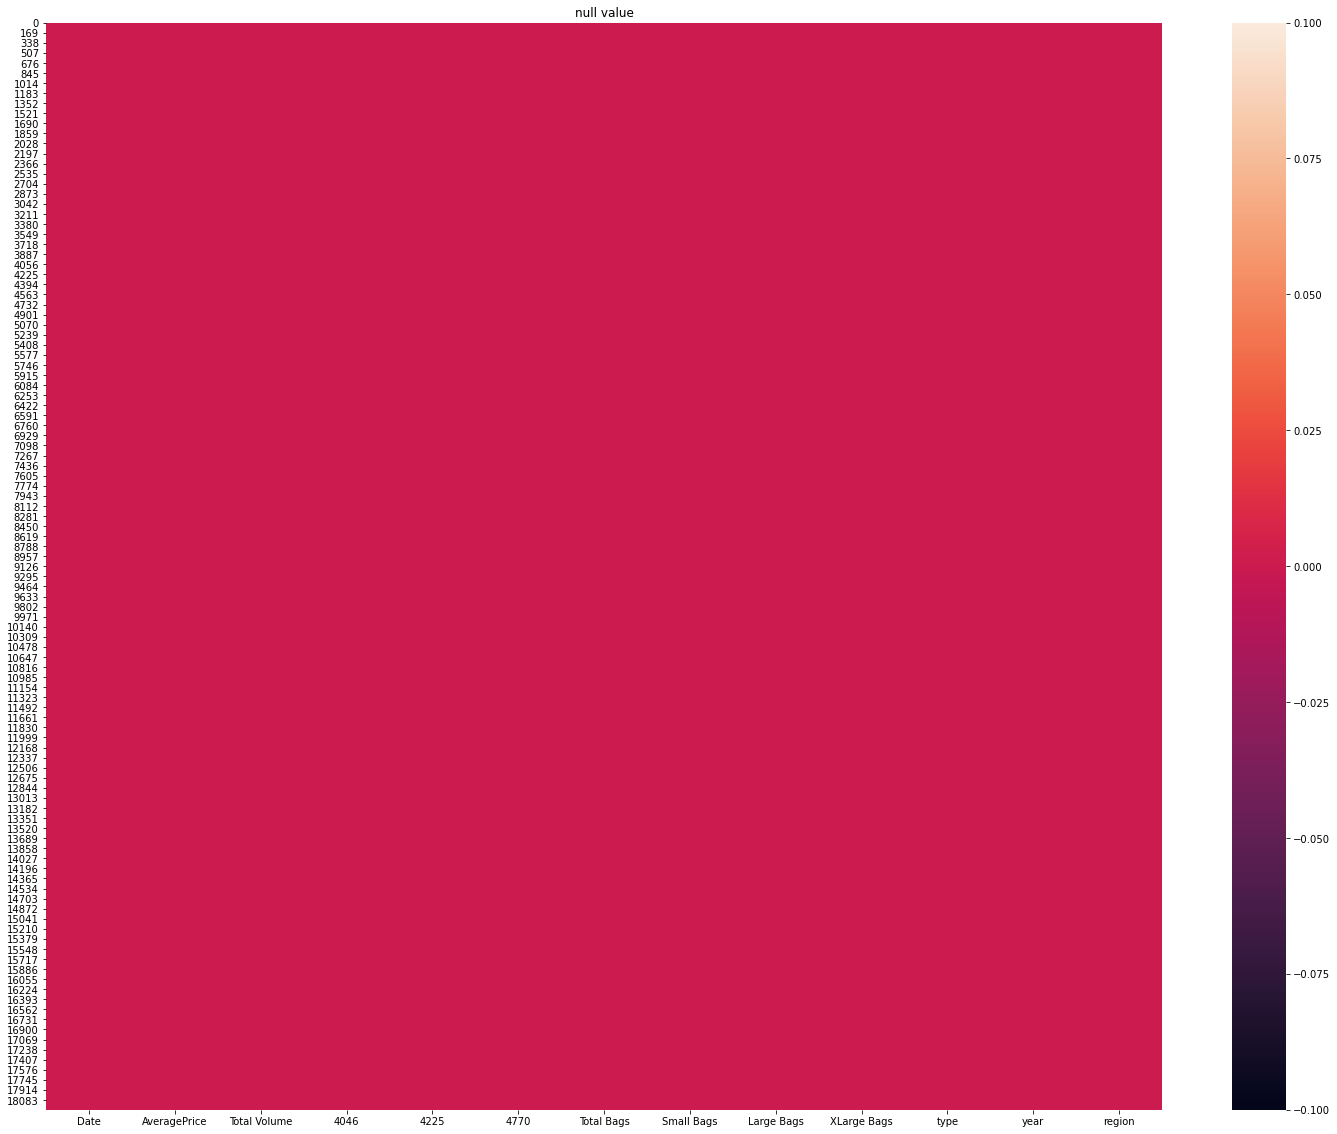

In [178]:
plt.figure(figsize=[25,20])
sns.heatmap(df.isnull())
plt.title('null value')
plt.show()

By cross verifying we see that there are no null values present in the dataset.

In [179]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


By uisng the describe method with transpose format we are able to see that the information about numerical columns since onject data types are ignored in this function. The count columns again confirms of our dataset having no missing values.

From the results we can see that zero values present in columns 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags but they seem to be valid since there is a possibility of presence of a legitimate zero value.

In [180]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

All the unique values present in each column are segregated and listed here. This gives us an insight on how many categorical options like type and year are present and how many simply have continous data present.

In [181]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

The acceptable range for skewness is between +/-0.5. And we see almost all feature columns with skewness for now. Once we have processed the data further we may check for the skewness details again and if it still persists then we will need to treat it accordingly.

In [182]:
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str
df.drop(columns=['Date','year'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


We need to separated the Date column so that we can remove Date the object datatype column and year that is already present in Date so we are avoiding duplicate columns.

In [183]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)
df.drop(columns=['Day'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


Since we separated the Date column that was originally an object datatype the new columns generated were also object datatype even though they were holding integer values therefore we changed the datatype and changed the Day back to Date then got rid of the duplicate column again.

# Visualization :

In [184]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

There are two type of avocado i.e. conventional type and organic type.

<AxesSubplot:xlabel='type', ylabel='count'>

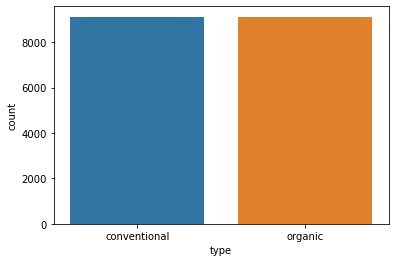

In [185]:
#now lets plot the count plot for the same
sns.countplot(df['type'])

Univarient analysis :

(array([ 331., 2632., 4824., 4506., 3412., 1672.,  598.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <BarContainer object of 10 artists>)

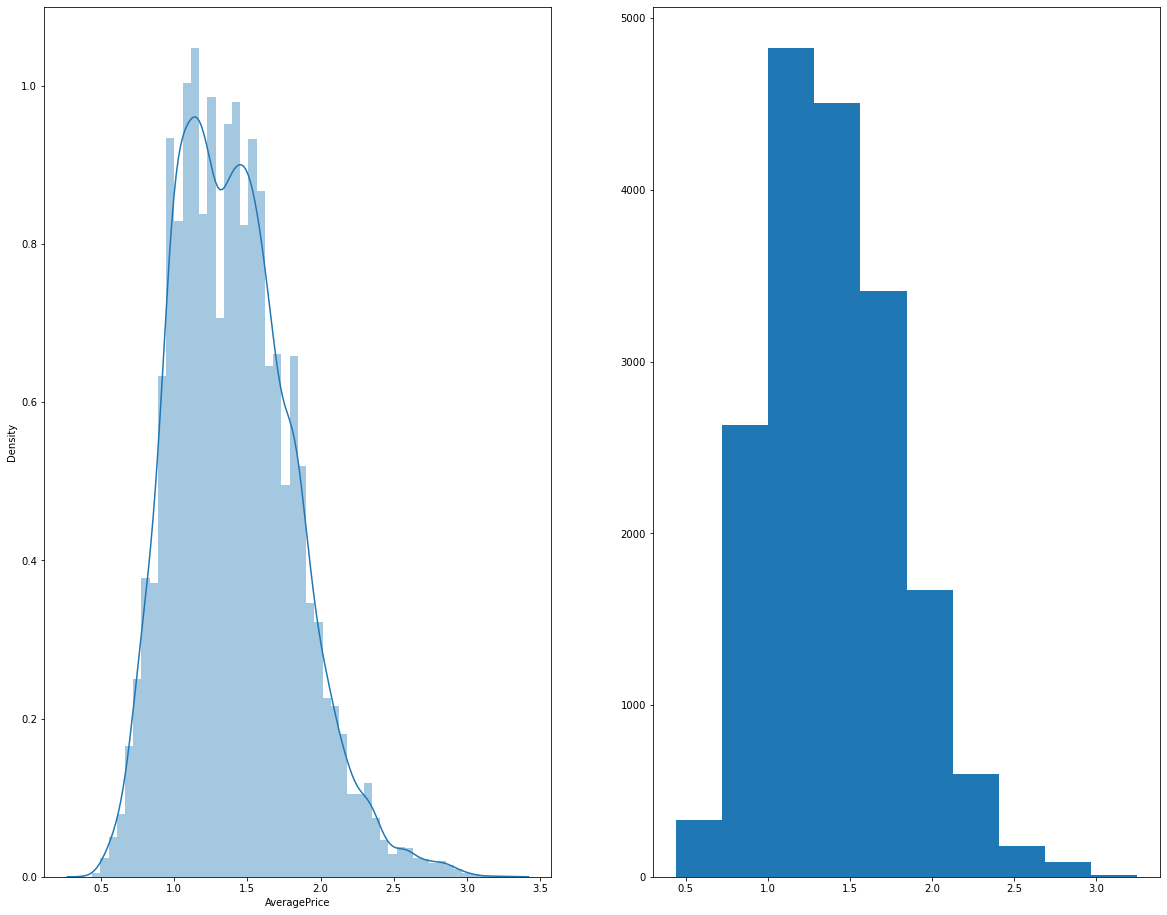

In [186]:
fig=plt.figure(figsize=(20,16))
fig.add_subplot(121)
sns.distplot(df.AveragePrice)

fig.add_subplot(122)
plt.hist(df.AveragePrice)

In [187]:
print('minimum price is:-',df['AveragePrice'].min())
print('maximum price is:-',df['AveragePrice'].max())

minimum price is:- 0.44
maximum price is:- 3.25


In [188]:
df['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

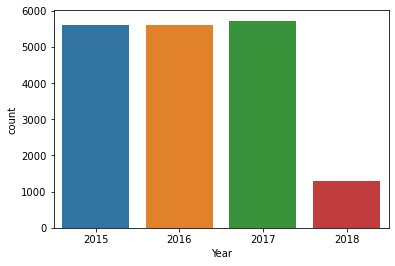

In [189]:
sns.countplot(df['Year'])

As we can check, in the "Year" column we see the the datapoints are very less for 2018 compared to the one's in 2015, 2016 and 2017.

Bivarient analysis :

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

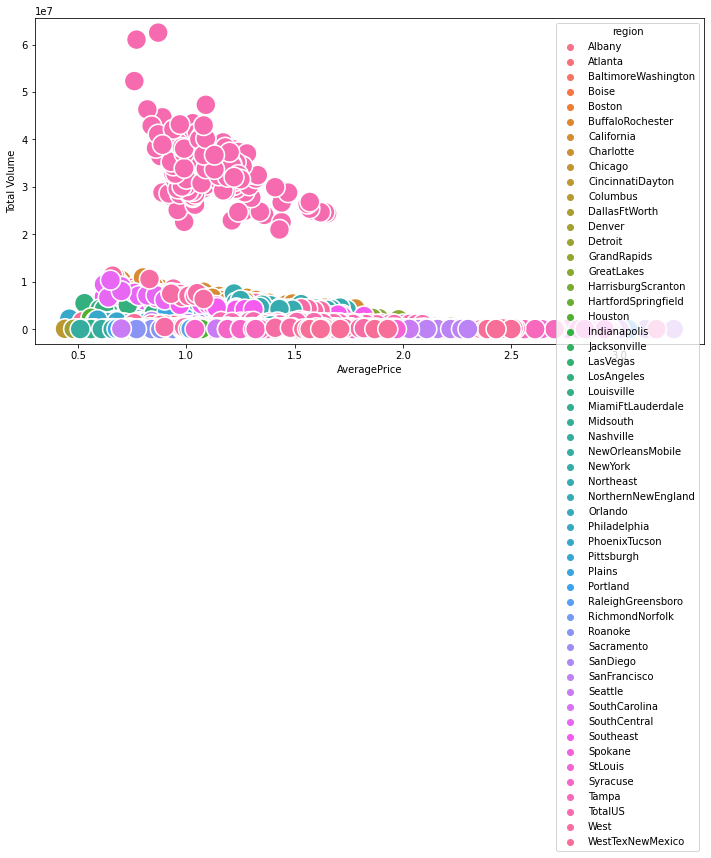

In [190]:
# price to volumne
plt.figure(figsize=(12,6))
sns.scatterplot(df["AveragePrice"],df['Total Volume'],hue=df['region'],s=400,marker="o")

<AxesSubplot:xlabel='Year', ylabel='AveragePrice'>

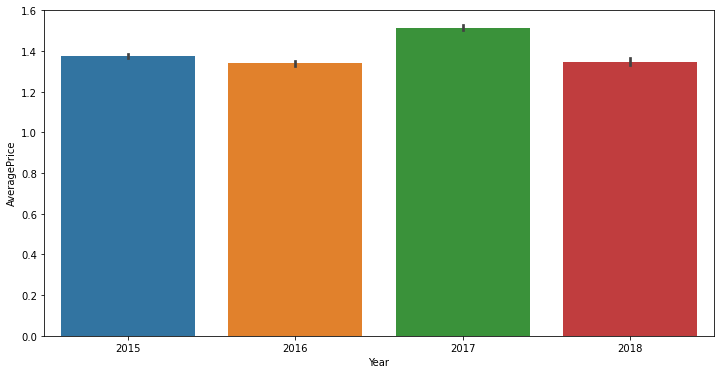

In [191]:
# price to year
plt.figure(figsize=(12,6))
sns.barplot(y=df['AveragePrice'],x=df['Year'],data=df)

As we can see avocado price is almost same in 2015,2016,2018 but small increment in 2017.

Multivarient analysis :

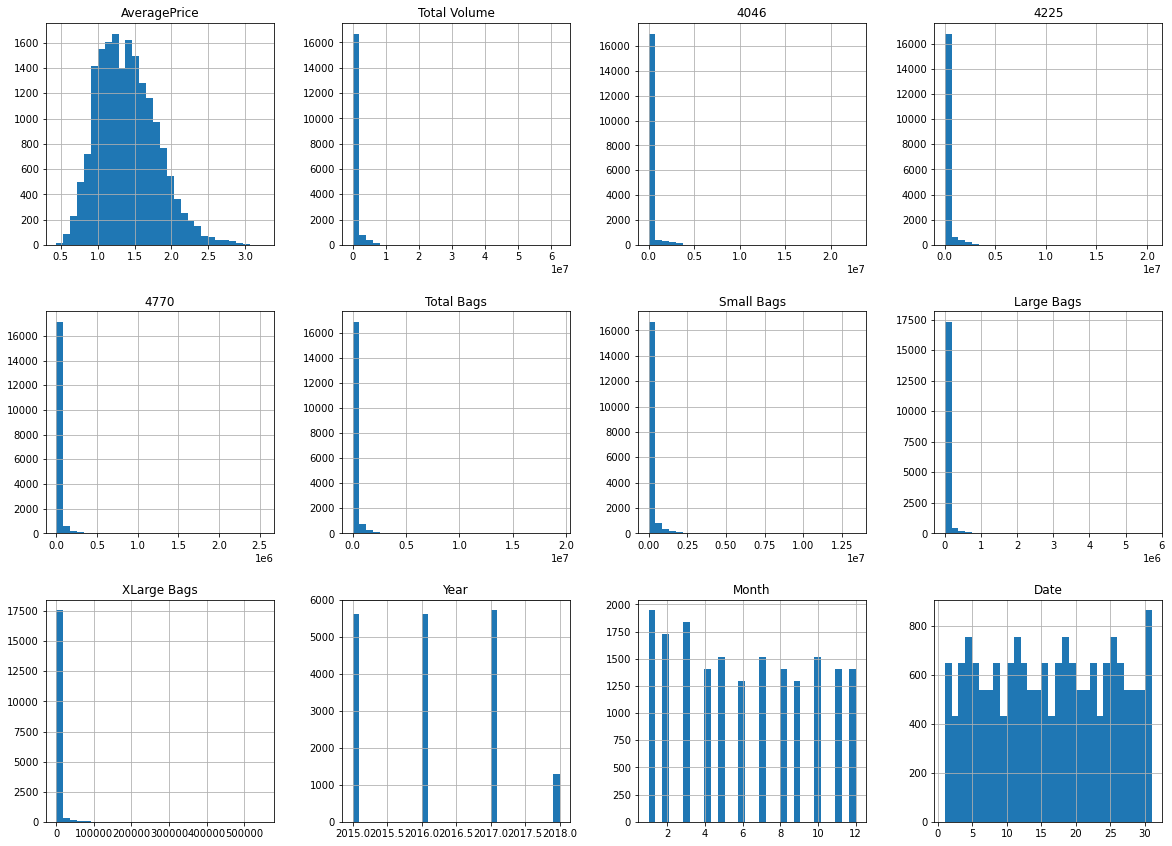

In [192]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)
plt.show()

From plotting this histogram, we used the bin size as 30, we can take any bin size.

 1.Average price column is normally distributing over the histogram.
 
 2.Rest of the data are not much varying in term of numbers, so they are almost left skewed data.
 
 3.To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.

In [193]:
df.drop(["4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags"], axis=1, inplace=True)

We are removing the columns "4046", "4225", "4770", "Small Bags", "Large Bags" and "XLarge Bags" to avoid the multi colinearity concern in our dataset.

# Encoding : 

In [194]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Date
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


By using the ordinal encoding method we have changed the object datatype columns into numeric values as machine learning models cannot process object data types.

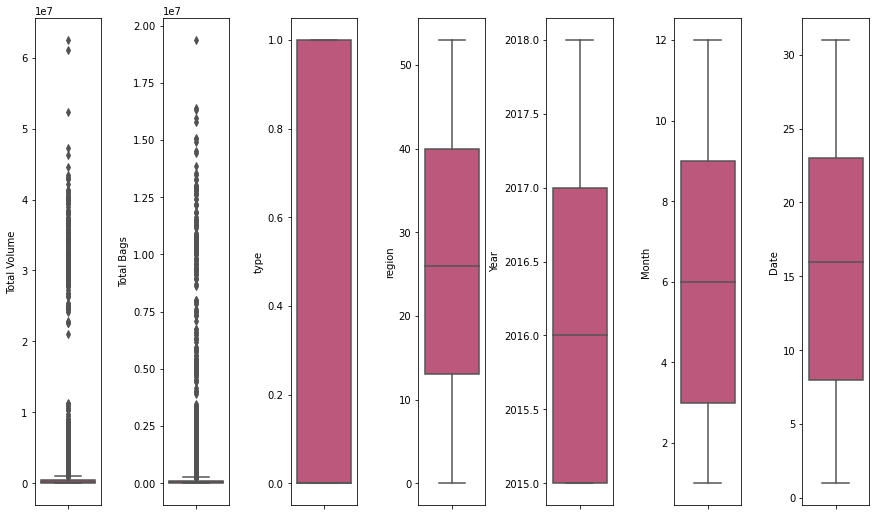

In [195]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In the above box plot we see some outliers present in our feature columns "Total Volume" and "Total Bags" so we shall treat it with the usage of zscore.

# Z Score Method to Remove Outliers :

In [196]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape before removing outliers: ", df.shape)
print ("Shape after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape before removing outliers:  (18249, 8)
Shape after removing outliers:  (17931, 8)
Percentage of data loss post outlier removal:  1.7425612362321221


We have used the Z score method to remove outlier that we could afford to lose from our original dataset. As we can check since there were not many data points removed our new dataset would still have outlier traces but we would like to retain them.

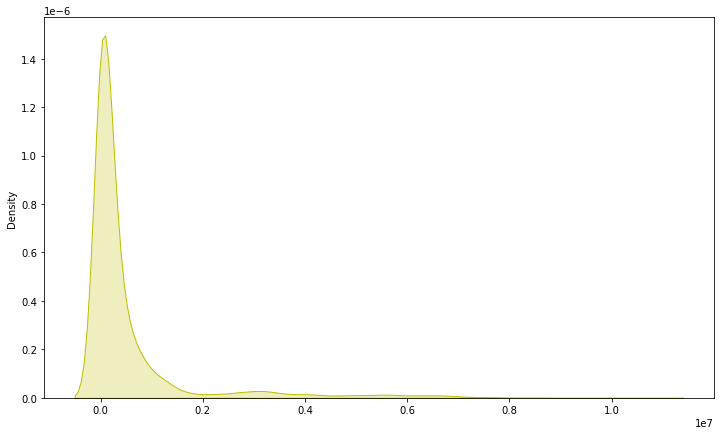

In [197]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Volume"], hist=False, color="y", kde_kws={"shade": True})
plt.show()

We see right skewness in the column Total Volume that had outliers.

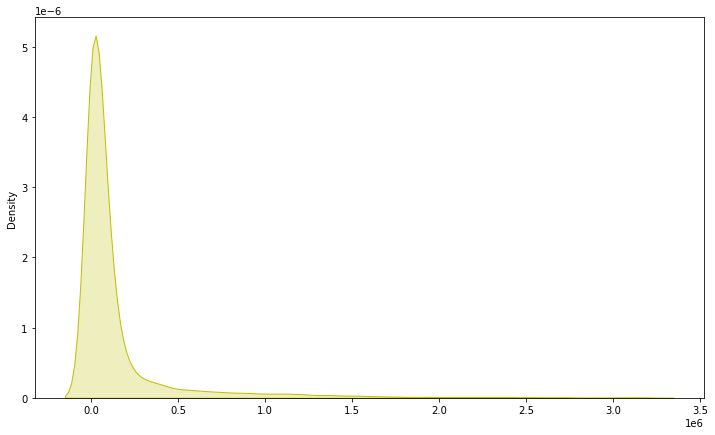

In [198]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Bags"], hist=False, color="y", kde_kws={"shade": True})
plt.show()

We see right skewness in the column Total Volume that had outliers.

# X and Y Variables :

In [199]:
X = df.drop('AveragePrice', axis=1)
Y = df['AveragePrice']

We have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column

# Scaling : 

In [200]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Total Volume,Total Bags,type,region,Year,Month,Date
0,-0.396584,-0.413139,-1.00296,-1.694204,-1.215795,1.650340,1.291781
1,-0.404396,-0.410836,-1.00296,-1.694204,-1.215795,1.650340,0.493909
2,-0.351527,-0.414710,-1.00296,-1.694204,-1.215795,1.650340,-0.303964
3,-0.384268,-0.421359,-1.00296,-1.694204,-1.215795,1.650340,-1.101837
4,-0.407599,-0.420297,-1.00296,-1.694204,-1.215795,1.367566,1.519745


We are scaling feature data to ensure that there is no issue with the data biasness.

# Regression Models :

In [201]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.4555521042103937 on Random State 948


With the help of random state selection process we have found the number to be 948 among 1-1000

# Training and testing : 

In [202]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=948)

We are taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

In [203]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [204]:
# Linear Regression Model
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.29620133468975096
R2 Score is: 42.670446049835554
Cross Validation Score: 3.1606400668191355
R2 Score - Cross Validation Score is 39.50980598301642


Created the Linear Regression model and checked it's evaluation metrics.

In [205]:
# Ridge Regression
model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.2962200962572321
R2 Score is: 42.663183244213485
Cross Validation Score: 3.424564962297816
R2 Score - Cross Validation Score is 39.23861828191567


In [206]:
# Lasso Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.39135576574032005
R2 Score is: -0.08016521165494783
Cross Validation Score: -116.71934809126752
R2 Score - Cross Validation Score is 116.63918287961258


In [207]:
# Support Vector Regression
from sklearn.svm import SVR
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.27902129746918336
R2 Score is: 49.12794889153556
Cross Validation Score: -10.798720340713327
R2 Score - Cross Validation Score is 59.926669232248884


In [208]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
pred=tree.predict(x_test)
print('r2 score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2 score: 0.606256213990178
MAE: 0.1675095602294455
MSE: 0.05945130656469089
RMSE: 0.24382638611251836


In [209]:
# Random Forest Regressor
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.2992478594558071
R2 Score is: 41.48507595795944
Cross Validation Score: -14.875277808227388
R2 Score - Cross Validation Score is 56.360353766186826


In [210]:
# K Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.29825184755342166
R2 Score is: 41.873948040121824
Cross Validation Score: -13.161355940148617
R2 Score - Cross Validation Score is 55.03530398027044


In [211]:
# Gradient Boosting Regressor
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.2805291831328965
R2 Score is: 48.576618128568626
Cross Validation Score: -17.36478460683073
R2 Score - Cross Validation Score is 65.94140273539935


In [212]:
# Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.27482103626383064
R2 Score is: 50.64803079302484
Cross Validation Score: -1.6804285862615973
R2 Score - Cross Validation Score is 52.328459379286436


In [213]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.18137455689781884
R2 Score is: 78.50401900626707
Cross Validation Score: 19.091343389990573
R2 Score - Cross Validation Score is 59.4126756162765


In [ ]:
# XGB Regressor
from xgboost import XGBRegressor
model=XGBRegressor()
reg(model, X, Y)

Created all the Regressor model and checked it's evaluation metrics.

# Hyper parameter :

In [ ]:
# Choosing XGB Regressor

fmod_param = {'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

In [ ]:
GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)

In [ ]:
GSCV.fit(X_train,Y_train)

In [ ]:
GSCV.best_params_

In [ ]:
GSCV.best_score_

In [ ]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

We have successfully incorporated the Hyper Parameter Tuning on Final Model and received the R2 score for it

# Saving the best model

In [ ]:
import joblib
filename = "FinalModel_E02.pkl"
joblib.dump(Final_Model, filename)

We have saved best regression model using the joblib library.